# Hypotheses
### 1. Runtime vs. gross
### 2. higher movie budget = higher gross
### 3. directors with more experience have higher gross
### 4. type of genre returns higher gross
### - benefits from not having to clean up groups /columns

In [1]:
# import relevant modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read in the csv file into a df
movies_df = pd.read_csv('zippedData/movies.csv')
movies_df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
# general info on the data - check datatypes and columns with missing rows
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [4]:
# describe method for columns with numerical data
movies_df.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


## Data-cleaning

In [5]:
# drop the missing values without a budget
movies_df.dropna(inplace=True)

In [6]:
# checking dataframe again to make sure there are no longer any missing values
# we lost about 2200 movies because they did not specify a production budget
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5421 entries, 0 to 7652
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5421 non-null   object 
 1   rating    5421 non-null   object 
 2   genre     5421 non-null   object 
 3   year      5421 non-null   int64  
 4   released  5421 non-null   object 
 5   score     5421 non-null   float64
 6   votes     5421 non-null   float64
 7   director  5421 non-null   object 
 8   writer    5421 non-null   object 
 9   star      5421 non-null   object 
 10  country   5421 non-null   object 
 11  budget    5421 non-null   float64
 12  gross     5421 non-null   float64
 13  company   5421 non-null   object 
 14  runtime   5421 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 677.6+ KB


In [7]:
movies_df.describe()

,year,score,votes,budget,gross,runtime
count,5421.000000,5421.000000,5.421000e+03,5.421000e+03,5.421000e+03,5421.000000
mean,2001.661317,6.392455,1.150661e+05,3.600917e+07,1.032297e+08,108.152739
std,10.540908,0.962730,1.844073e+05,4.157337e+07,1.873027e+08,18.115698
min,1980.000000,1.900000,1.950000e+02,6.000000e+03,3.090000e+02,63.000000
25%,1993.000000,5.800000,1.900000e+04,1.000000e+07,1.073640e+07,95.000000
50%,2002.000000,6.500000,5.200000e+04,2.180000e+07,3.686941e+07,105.000000
75%,2011.000000,7.100000,1.290000e+05,4.500000e+07,1.124625e+08,118.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,271.000000


# Correlation

<AxesSubplot:>

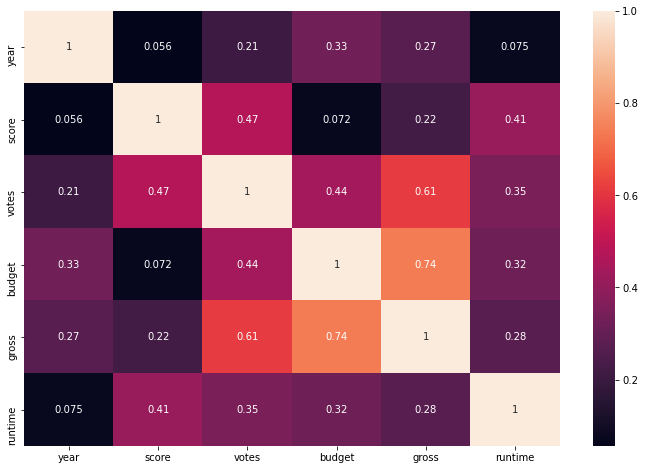

In [8]:
# visualize the correlation between columns with a heatmap using seaborn
plt.figure(figsize=(12,8))
sns.heatmap(movies_df.corr(), annot=True)

# Which month has the highest revenue?

In [9]:
# get a look at the last 10 rows of the data
# all recent movies that released during 2020
movies_df.tail(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000.0,426505244.0,Columbia Pictures,124.0
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000.0,319715683.0,Paramount Pictures,99.0
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000.0,245487753.0,Universal Pictures,101.0
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000.0,111105497.0,20th Century Studios,100.0
7652,The Eight Hundred,Not Rated,Action,2020,"August 28, 2020 (United States)",6.8,3700.0,Hu Guan,Hu Guan,Zhi-zhong Huang,China,80000000.0,461421559.0,Beijing Diqi Yinxiang Entertainment,149.0


## The 'released' column is a string object containing parentheses with the country the film was released in
### - Will perform data-cleaning to isolate the date on its own and convert to a pandas datetime object

In [10]:
# new column to remove the country of origin from the release date
movies_df['release'] = movies_df['released'].str.split('(').str[0]
movies_df['release']

0           June 13, 1980 
1            July 2, 1980 
2           June 20, 1980 
3            July 2, 1980 
4           July 25, 1980 
               ...        
7648     January 17, 2020 
7649    February 14, 2020 
7650     January 17, 2020 
7651    February 21, 2020 
7652      August 28, 2020 
Name: release, Length: 5421, dtype: object

In [11]:
# create a new column called 'release_date' that will be stored as a datetime object
movies_df['release_date'] = pd.to_datetime(movies_df['release'])

In [12]:
# now drop the released and release columns since we have our release_date column stored as datetime objects
movies_df.drop(['released', 'release'], axis=1, inplace=True)

In [13]:
# get a look at the movies_df now that we created a new release_date column
movies_df

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,release_date
0,The Shining,R,Drama,1980,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980-06-13
1,The Blue Lagoon,R,Adventure,1980,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980-07-02
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980-06-20
3,Airplane!,PG,Comedy,1980,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980-07-02
4,Caddyshack,R,Comedy,1980,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980-07-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000.0,426505244.0,Columbia Pictures,124.0,2020-01-17
7649,Sonic the Hedgehog,PG,Action,2020,6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000.0,319715683.0,Paramount Pictures,99.0,2020-02-14
7650,Dolittle,PG,Adventure,2020,5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000.0,245487753.0,Universal Pictures,101.0,2020-01-17
7651,The Call of the Wild,PG,Adventure,2020,6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000.0,111105497.0,20th Century Studios,100.0,2020-02-21


## To get a chart of the average movie gross by month, I first have to create a month column. This 'month' column will be extracted from the recently created release_date column

In [14]:
# create a month column 
movies_df['month'] = movies_df['release_date'].dt.month
movies_df

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,release_date,month
0,The Shining,R,Drama,1980,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980-06-13,6
1,The Blue Lagoon,R,Adventure,1980,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980-07-02,7
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980-06-20,6
3,Airplane!,PG,Comedy,1980,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980-07-02,7
4,Caddyshack,R,Comedy,1980,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980-07-25,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000.0,426505244.0,Columbia Pictures,124.0,2020-01-17,1
7649,Sonic the Hedgehog,PG,Action,2020,6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000.0,319715683.0,Paramount Pictures,99.0,2020-02-14,2
7650,Dolittle,PG,Adventure,2020,5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000.0,245487753.0,Universal Pictures,101.0,2020-01-17,1
7651,The Call of the Wild,PG,Adventure,2020,6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000.0,111105497.0,20th Century Studios,100.0,2020-02-21,2


In [15]:
# create a condensed dataframe that will be used to hold the release month of every film
month_release = movies_df['release_date'].dt.month
month_release = pd.DataFrame(month_release)

In [16]:
month_release

,release_date
0,6
1,7
2,6
3,7
4,7
...,...
7648,1
7649,2
7650,1
7651,2


In [17]:
# create a 'gross' column in our condensed dataframe
# the 'gross' column will be the same as the original 'gross' column from the movies_df
month_release['gross'] = movies_df['gross']
month_release

,release_date,gross
0,6,46998772.0
1,7,58853106.0
2,6,538375067.0
3,7,83453539.0
4,7,39846344.0
...,...,...
7648,1,426505244.0
7649,2,319715683.0
7650,1,245487753.0
7651,2,111105497.0


In [18]:
# use groupby method to get the average 'gross' by each month
mean_revenue = month_release.groupby('release_date').mean()
mean_revenue

,gross
release_date,
1,6.263414e+07
2,7.407725e+07
3,8.771098e+07
4,7.240579e+07
5,1.697053e+08
6,1.672293e+08
7,1.519452e+08
8,6.736884e+07
9,5.390261e+07


# Visualizations

## Production budget vs. Gross

Text(0, 0.5, 'Gross (in hundreds of millions)')

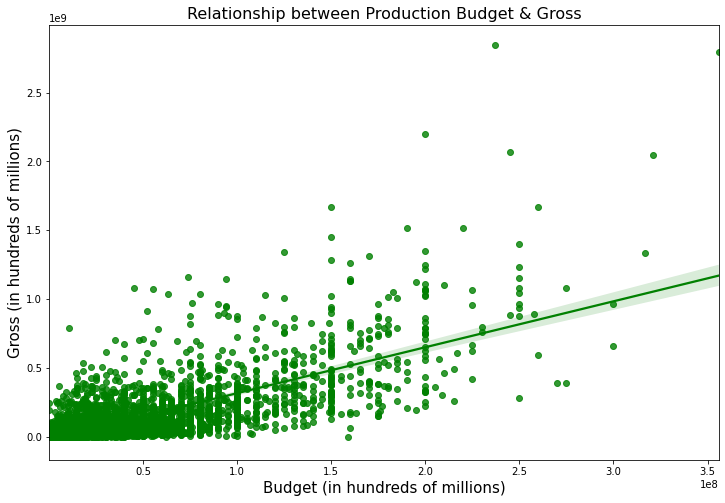

In [19]:
# using a regression plot to analyze relationship between production budget and gross
plt.figure(figsize=(12,8))

# use seaborn to create the regression plot
sns.regplot(x=movies_df['budget'],y=movies_df['gross'],color='g')

# add title and axes labels
plt.title('Relationship between Production Budget & Gross', fontsize=16)
plt.xlabel('Budget (in hundreds of millions)', fontsize=15)
plt.ylabel('Gross (in hundreds of millions)', fontsize=15)

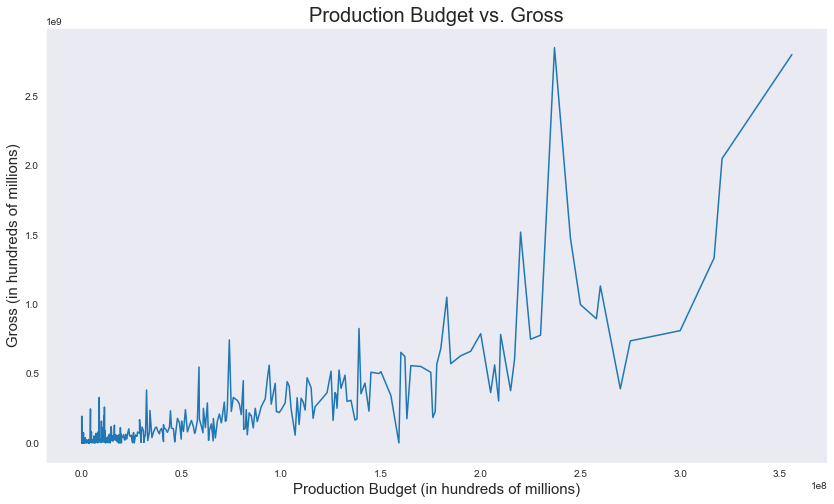

In [35]:
# lineplot to try and find a minimum budget to recommend
# using seaborn
plt.figure(figsize=(14, 8))
sns.lineplot(x=movies_df['budget'],y=movies_df['gross'], ci=None)

# title and axes labels
sns.set_style('dark')
plt.title('Production Budget vs. Gross', fontsize=20)
plt.xlabel('Production Budget (in hundreds of millions)', fontsize=15)
plt.ylabel('Gross (in hundreds of millions)', fontsize=15)


plt.savefig('ProdBudg_Gross.png')
plt.show()

## Runtime vs. Gross

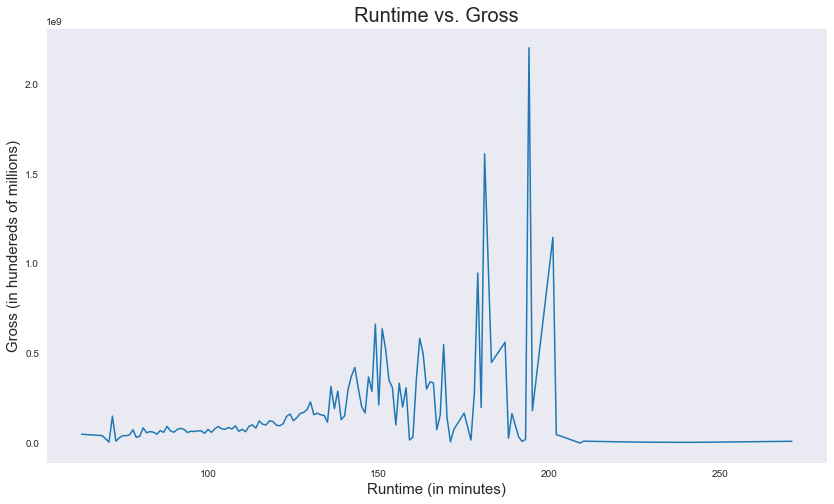

In [36]:
# create a lineplot using seaborn to visualize relationship between runtime of a movie and gross of a movie
plt.figure(figsize=(14, 8))
sns.lineplot(x=movies_df['runtime'],y=movies_df['gross'], ci=None)

# title and axes labels
sns.set_style('dark')
plt.title('Runtime vs. Gross', fontsize=20)
plt.xlabel('Runtime (in minutes)', fontsize=15)
plt.ylabel('Gross (in hundereds of millions)', fontsize=15)

plt.savefig('Runtime_Gross.png')
plt.show()

## Distribution of Runtime

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


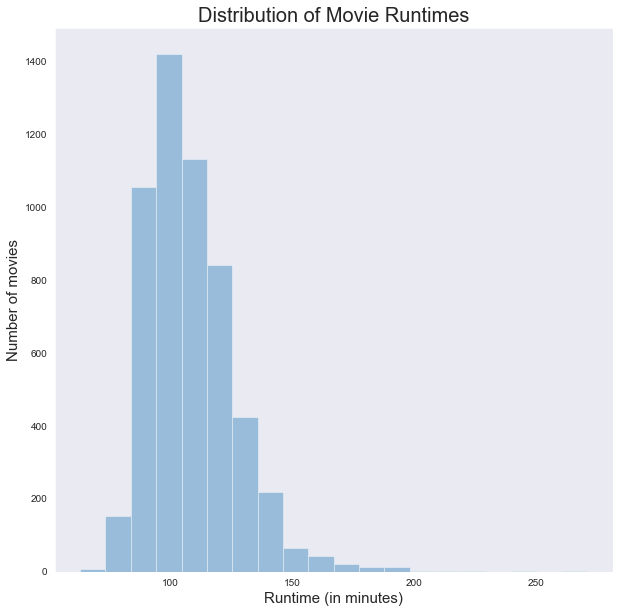

In [37]:
# distribution plot to visualize the movies by runtime (in minutes)
plt.figure(figsize=(10,10))
sns.distplot(movies_df['runtime'], kde=False, bins=20)

# add title and axes labels
plt.title('Distribution of Movie Runtimes', fontsize=20)
plt.xlabel('Runtime (in minutes)', fontsize=15)
plt.ylabel('Number of movies', fontsize=15)

plt.savefig('RuntimeDistribution.png')
plt.show()

## Genres by Avg. Gross

In [23]:
# check the value counts of each genre
# genres with less than 10 movies may be misleading on a visualization
movies_df['genre'].value_counts()

Comedy       1496
Action       1415
Drama         863
Crime         399
Adventure     327
Biography     311
Animation     277
Horror        251
Fantasy        41
Mystery        17
Thriller        7
Sci-Fi          6
Romance         5
Family          4
Western         2
Name: genre, dtype: int64

In [24]:
# group the dataset by genre and store into a separate variable
genre_groupby = movies_df.groupby('genre')

# using describe method and indexing to get the average gross by genre
genre_groupby.describe()['gross']['mean']

genre
Action       1.680232e+08
Adventure    1.332682e+08
Animation    2.811044e+08
Biography    6.139527e+07
Comedy       5.916766e+07
Crime        5.016958e+07
Drama        6.036914e+07
Family       5.185831e+08
Fantasy      3.987870e+07
Horror       5.681695e+07
Mystery      1.178877e+08
Romance      3.357538e+07
Sci-Fi       3.761010e+07
Thriller     4.248814e+07
Western      1.001294e+07
Name: mean, dtype: float64

In [25]:
# need to grab only the top genres with more than 10 films in the dataset
x = movies_df['genre'].value_counts().index[:10]
x = x.sort_values()
x

Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Drama', 'Fantasy', 'Horror', 'Mystery'],
      dtype='object')

In [26]:
# hardcoding to get values specific to the genre
# start at 0 but stopping at family because the family genre only has 4 movies in the dataset
y = genre_groupby.describe()['gross']['mean'].values[:7]

y = list(y)
y

[168023228.8106007,
 133268232.13455658,
 281104365.01805055,
 61395274.263665594,
 59167658.836898394,
 50169579.35338346,
 60369136.46465817]

In [27]:
# grab other values for genre
# start at 8 (one after family)
# grabbing 'horror' through 'mystery'
to_add = list(genre_groupby.describe()['gross']['mean'].values[8:11])
to_add


[39878697.780487806, 56816952.3187251, 117887733.35294117]

In [28]:
# append these values to the previous list assigned to variable y
for element in to_add:
    y.append(element)
y

[168023228.8106007,
 133268232.13455658,
 281104365.01805055,
 61395274.263665594,
 59167658.836898394,
 50169579.35338346,
 60369136.46465817,
 39878697.780487806,
 56816952.3187251,
 117887733.35294117]

In [29]:
# check the length of x to make sure they match for the barchart
len(x)

10

In [30]:
# check the length of y to make sure they match the barchart
len(y)

10

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


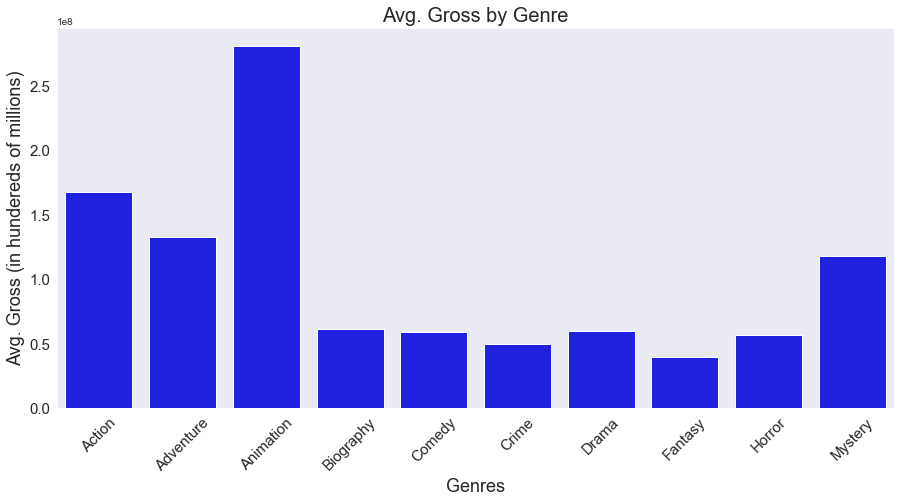

In [38]:
# barchart to show avg. gross by genre
# using seaborn module
plt.figure(figsize=(15,7))
sns.barplot(x, y, color='blue')

# add title and axes labels
# rotating x-tick labels and editing fontsize so that is is readable
plt.title('Avg. Gross by Genre', fontsize=20)
plt.xlabel('Genres', fontsize=18)
plt.ylabel('Avg. Gross (in hundereds of millions)', fontsize=18)
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=15)

plt.savefig('Gross_by_Genre.png')
plt.show()

## Mean Revenue by Month

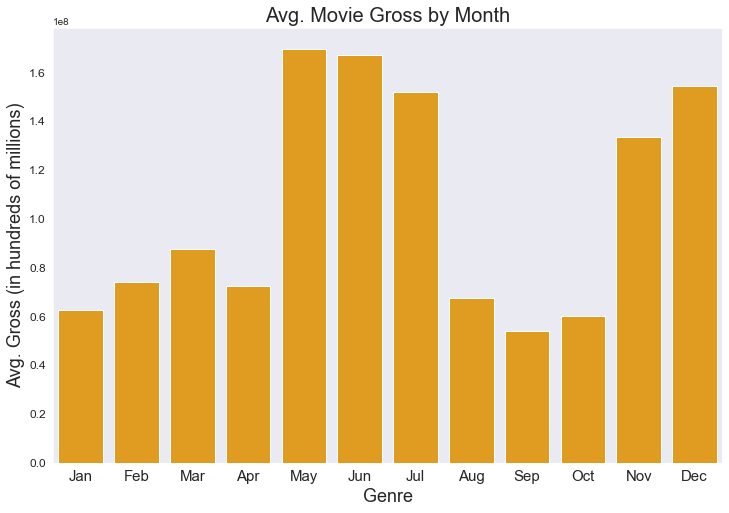

In [39]:
# month column is currently stored as numbers
# hard-coded labels to add as x-tick labels
x_tick_labels = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

# using seaborn library to create barchart of avg. gross by month
plt.figure(figsize=(12,8))
sns.barplot(x=x_tick_labels, y=mean_revenue['gross'], color='orange')

# add title and axes labels
plt.title('Avg. Movie Gross by Month', fontsize=20)
plt.xlabel('Genre', fontsize=18)
plt.ylabel('Avg. Gross (in hundreds of millions)',fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)

plt.savefig('AvgGross_Month.png')
plt.show()

### Alternative visualization to the barchart above. Instead, visualizing the same data using a lineplot with seaborn

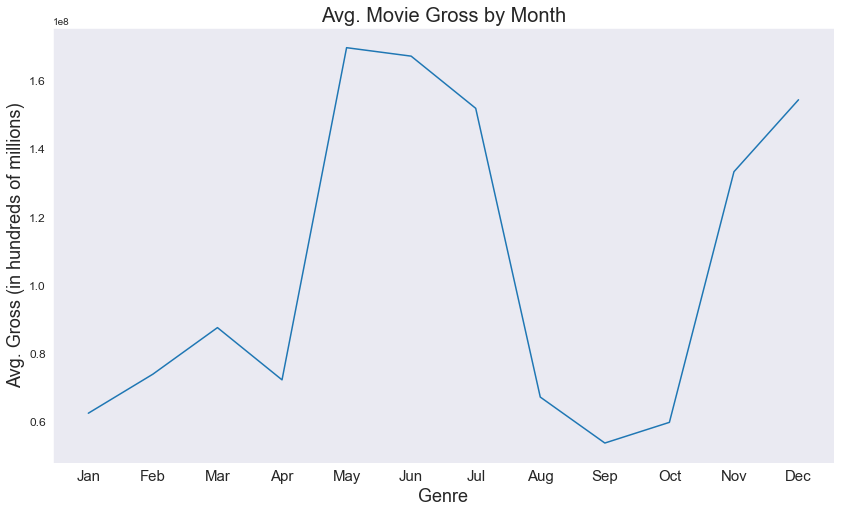

In [40]:
# lineplot using seaborn
plt.figure(figsize=(14, 8))
sns.lineplot(x=x_tick_labels,y=mean_revenue['gross'], ci=None)

# title and axes labels
sns.set_style('darkgrid')
plt.title('Avg. Movie Gross by Month', fontsize=20)
plt.xlabel('Genre', fontsize=18)
plt.ylabel('Avg. Gross (in hundreds of millions)',fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)

plt.savefig('AvgGross_Month_line.png')
plt.show()